In [54]:
import sys
import importlib
import pyLDAvis.gensim
import pyLDAvis
import pandas as pd

sys.path.append('./codes')
from codes.topic_modeling import LDA 
from codes.topic_modeling import classification
from codes.topic_modeling import text_preprocessing
from codes.topic_modeling import visualization
import importlib
importlib.reload(LDA)
importlib.reload(classification)
importlib.reload(text_preprocessing)
importlib.reload(visualization)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from codes.topic_modeling.LDA import *
from codes.topic_modeling.classification import *
from codes.topic_modeling.text_preprocessing import *
from codes.topic_modeling.visualization import *

from codes.loading_and_filtering.data_loader import load_reviews
from codes.loading_and_filtering.parameters import *



In [53]:
category = categories[17]
df = load_reviews(category)

In [55]:
df.head(100)

,rating,text,parent_asin,timestamp
0,4.0,This review is more to clarify someone else’s ...,B07TDSJZMR,2020-02-06 00:49:35.902
1,5.0,Love these easy multitasking bleach tablets. B...,B08637FWWF,2020-11-02 22:03:06.880
2,5.0,I have been suffering a couple months with hee...,B07KJVGNN5,2019-07-24 11:13:58.905
3,4.0,"It's cheap and it does what I wanted. The ""ma...",B092RP73CX,2022-09-04 02:29:02.725
4,1.0,Didn't do a thing for me. Not saying they don'...,B08KYJLF5T,2022-01-20 23:53:07.262
...,...,...,...,...
95,1.0,DO NOT BUY. I purchased two packs and receive...,B00DZJF6SY,2020-02-23 22:38:19.862
96,5.0,This polisher did exactly what I wanted it to do,B0189CURIA,2019-06-27 22:02:05.384
97,5.0,These are pool/shower quality ear plugs! I hav...,B079BQY8G9,2019-07-29 03:53:32.077
98,5.0,I like these reading glasses a great deal for ...,B07GHG9P9P,2019-01-21 20:32:59.233


In [4]:
data = df[~df["text"].isna()]
data = data[data['text'].apply(lambda x: len(str(x).split()) > 10)]
sampled_per_rating = [data[data['rating'] == rating].sample(n=10000, random_state=42) for rating in range(1, 6)]
required_samples = pd.concat(sampled_per_rating, axis=0)
remaining_samples = data.drop(required_samples.index).sample(n=50000 - len(required_samples), random_state=42)
data = pd.concat([required_samples, remaining_samples], axis=0)
data = data[data['text'].apply(lambda x: len(str(x).split()) > 10)]
print(data['rating'].value_counts())

rating
1.0    10000
2.0    10000
3.0    10000
4.0    10000
5.0    10000
Name: count, dtype: int64


In [46]:
texts_bow, dictionary, id2token = preprocess_text(data, 100, 0.85)

--- Preprocessing starting ---
--- Tokenization done ---
--- Numbers and written out numbers removed ---
--- Two letter words removed ---
--- Verbs removed ---
--- Lematization done ---
--- Stopwords removed ---
--- Bigrams done ---
--- Common and rare words removed ---
--- Preprocessing done ---


In [48]:
n_topics = 9
model = LDA_training(data, texts_bow, dictionary, id2token, n_topics, 1000, 1, 100)

--- Arguments are correct ---
--- LDA starting ---
--- LDA finished ---
Medium koherence of topics: -3.3729.
Topic 0: bag, product, great, case, box, car, highly, supplement, workout, able, item, would, cat, quality, beautiful, vitamin, good, well, mom, travel
Topic 1: hair, well, easy, great, much, glass, brush, use, really, like, comfortable, nice, soft, hand, better, job, back, pad, little, easily
Topic 2: oil, bottle, pill, light, great, night, color, like, ear, little, also, well, time, machine, sleep, spray, day, white, sound, noise
Topic 3: size, perfect, small, little, large, perfectly, head, bite, great, would, big, nice, like, right, time, smaller, teeth, well, cup, toothbrush
Topic 4: product, time, day, year, pain, first, great, back, month, week, every, new, would, knee, several, old, issue, cushion, dog, highly
Topic 5: great, product, good, amaze, though, work, really, even, excellent, well, day, brand, protein, price, best, like, week, time, couple, review
Topic 6: like

indicies: [224302, 377564, 437893, 302925, 235987, 75222, 103261, 331954, 60431, 136261, 367982, 60513, 197444, 406185, 434038, 198856, 456823, 247702, 340251, 375474, 281490, 416336, 122506, 292472, 244182, 460875, 167109, 251597, 417695, 117493, 444601, 280153, 473166, 398404, 293806, 482479, 281040, 343213, 434043, 446050, 150854, 482954, 325623, 115998, 321048, 404891, 469653, 481069, 294740, 285332, 404733, 431813, 317388, 157183, 97777, 70573, 92376, 455669, 400462, 278922, 40298, 367807, 352243, 195192, 344091, 439773, 33928, 267386, 272841, 346787, 424694, 389931, 75846, 219229, 396028, 237311, 441278, 68566, 88052, 434369, 77817, 40729, 405210, 344601, 124927, 457075, 242184, 349625, 478080, 207613, 158270, 222108, 418865, 51167, 21616, 87739, 91343, 321225, 391986, 482189, 460078, 445901, 339143, 195450, 451410, 431302, 93021, 82391, 487354, 449677, 469727, 117520, 280912, 168381, 333140, 204733, 47000, 269147, 314974, 381992, 420953, 482630, 478232, 309233, 327584, 439538, 1

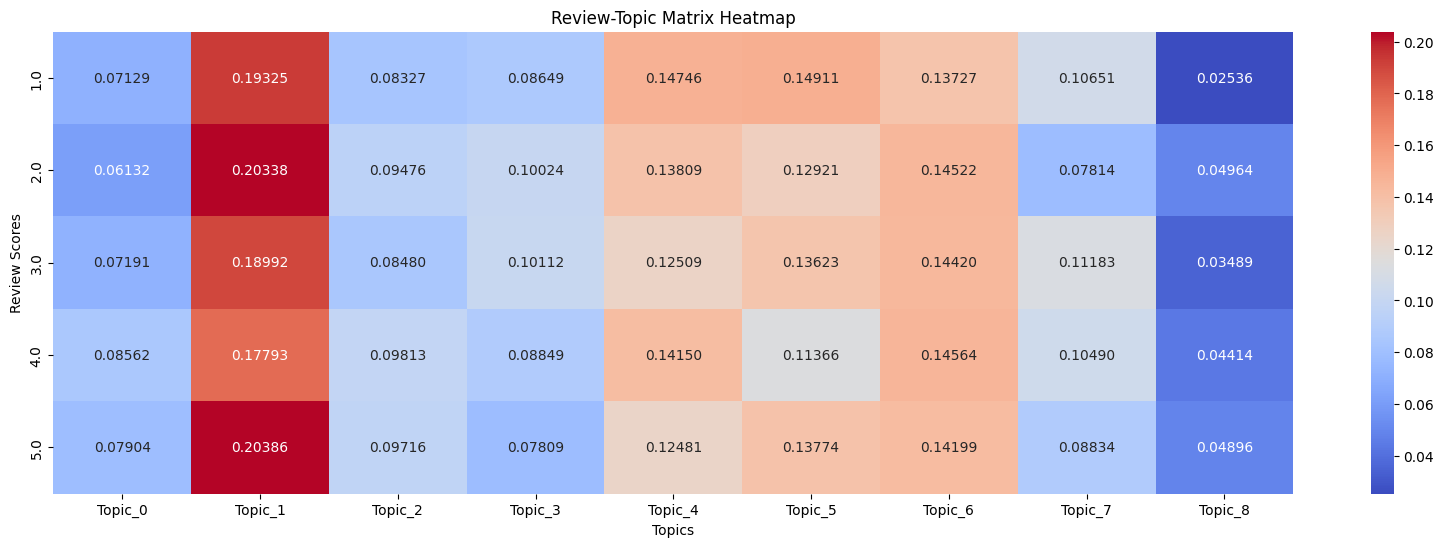

In [49]:
matrix  = create_review_topic_matrix_stars(data, model, texts_bow, n_topics, 0.3)

In [50]:
data_with_sentiment = add_sentiment_column2(data)

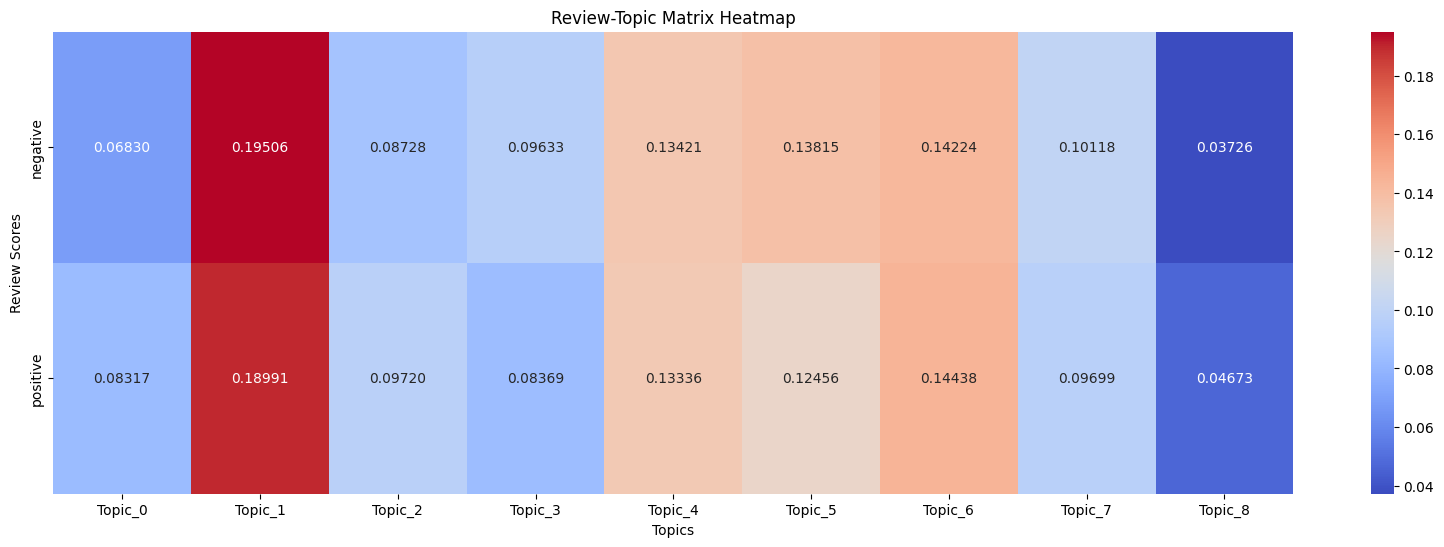

In [51]:
matrix  = create_review_topic_matrix_sentiment(data_with_sentiment, model, texts_bow, n_topics, 0.3)

In [15]:
vis = display_visuals_LDA(model, texts_bow, dictionary)
pyLDAvis.display(vis)

In [22]:
topics_per_document = [model.get_document_topics(bow, minimum_probability=0.0) for bow in texts_bow]


In [23]:
topics_per_document

[[(0, 0.051150538),
  (1, 0.027901446),
  (2, 0.0236536),
  (3, 0.030797262),
  (4, 0.037302535),
  (5, 0.038474582),
  (6, 0.039469346),
  (7, 0.73014134),
  (8, 0.02110936)],
 [(0, 0.17610285),
  (1, 0.013172102),
  (2, 0.011048347),
  (3, 0.014793295),
  (4, 0.016286552),
  (5, 0.16137798),
  (6, 0.023289762),
  (7, 0.57462716),
  (8, 0.009301915)],
 [(0, 0.12904203),
  (1, 0.025048908),
  (2, 0.021687932),
  (3, 0.027593944),
  (4, 0.030478567),
  (5, 0.03309307),
  (6, 0.08274714),
  (7, 0.63254714),
  (8, 0.017761227)],
 [(0, 0.12326021),
  (1, 0.019863239),
  (2, 0.017035674),
  (3, 0.12778264),
  (4, 0.02385863),
  (5, 0.4215424),
  (6, 0.029454656),
  (7, 0.22322579),
  (8, 0.013976762)],
 [(0, 0.6953571),
  (1, 0.018278839),
  (2, 0.08766943),
  (3, 0.02017764),
  (4, 0.022162333),
  (5, 0.024908036),
  (6, 0.025842236),
  (7, 0.092663944),
  (8, 0.012940445)],
 [(0, 0.030394496),
  (1, 0.017939398),
  (2, 0.014503131),
  (3, 0.020153968),
  (4, 0.5042466),
  (5, 0.09358541),

In [24]:
topics_per_document = [model.get_document_topics(bow, minimum_probability=0.5) for bow in texts_bow]


In [25]:
topics_per_document

[[(7, 0.73010874)],
 [(7, 0.5746207)],
 [(7, 0.63258165)],
 [],
 [(0, 0.69535565)],
 [(4, 0.5042572)],
 [],
 [],
 [],
 [(7, 0.7026819)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(7, 0.51584214)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(7, 0.5165162)],
 [],
 [],
 [],
 [(3, 0.5548527)],
 [],
 [],
 [],
 [],
 [],
 [],
 [(7, 0.6959767)],
 [],
 [],
 [(7, 0.62161076)],
 [(4, 0.6249697)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(7, 0.5946337)],
 [],
 [],
 [],
 [(7, 0.6255763)],
 [],
 [],
 [],
 [(7, 0.6383218)],
 [],
 [(7, 0.52861494)],
 [(3, 0.5143681)],
 [(7, 0.5138414)],
 [(7, 0.60329175)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(7, 0.69662565)],
 [],
 [],
 [(3, 0.6211284)],
 [],
 [],
 [(7, 0.5251898)],
 [],
 [],
 [],
 [],
 [(7, 0.6063698)],
 [],
 [(3, 0.50673217)],
 [],
 [(0, 0.5650149)],
 [],
 [(7, 0.6568366)],
 [],
 [],
 [],
 [],
 [(7, 0.5829184)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [(7, 0.56425446)],
 [],
 [],
 []

In [19]:
unique_reviews = sorted(data['rating'].unique())
unique_reviews

[1.0, 2.0, 3.0, 4.0, 5.0]

In [20]:
indices = None
for i, review in enumerate(unique_reviews):
        indices = data[data['rating'] == review].index.tolist()

indices       

[134,
 175866,
 449067,
 52230,
 355637,
 452619,
 80425,
 408487,
 348538,
 103877,
 330887,
 151794,
 2943,
 116531,
 175586,
 373896,
 261371,
 238637,
 87381,
 365579,
 307390,
 143203,
 133308,
 185255,
 344050,
 247940,
 75562,
 2684,
 76818,
 462248,
 369541,
 351870,
 214391,
 33422,
 173179,
 29717,
 192943,
 438958,
 365179,
 141161,
 332219,
 151161,
 218744,
 127400,
 120026,
 342601,
 249516,
 221301,
 476265,
 261426,
 238853,
 204762,
 9326,
 319312,
 255784,
 98083,
 67486,
 170407,
 467940,
 180861,
 31621,
 421076,
 255467,
 446714,
 123652,
 228311,
 19141,
 2521,
 296088,
 24900,
 199807,
 78237,
 393884,
 270302,
 285187,
 422925,
 235366,
 480429,
 371697,
 255765,
 432876,
 222971,
 330526,
 256132,
 414401,
 436415,
 178116,
 474462,
 177886,
 50231,
 25021,
 403398,
 37817,
 51389,
 464520,
 184359,
 102161,
 388011,
 369246,
 314633,
 5256,
 407940,
 15476,
 433594,
 427083,
 449277,
 284192,
 362367,
 314746,
 274556,
 483859,
 58961,
 192080,
 99522,
 4632,
